<a href="https://colab.research.google.com/github/krishnakategaru/Machine-Learning/blob/master/imdb%20review%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [81]:
import os
import shutil
import string
import re
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing


In [82]:
from tensorflow.keras import Input
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization as tv  

In [83]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [84]:
dataset=tf.keras.utils.get_file("krishna_file",url,untar=True,cache_subdir='',cache_dir='.')
dataset_dir=os.path.join(os.path.dirname(dataset),"aclImdb")

In [85]:
dataset_dir

'./aclImdb'

In [86]:
os.listdir(dataset_dir)

['README', 'test', 'imdbEr.txt', 'imdb.vocab', 'train']

In [87]:
train_dir=os.path.join(dataset_dir,'train')

In [88]:
os.listdir(train_dir)

['pos',
 'neg',
 'urls_pos.txt',
 'urls_neg.txt',
 'urls_unsup.txt',
 'unsupBow.feat',
 'labeledBow.feat',
 'unsup']

In [89]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [90]:
test_dir=os.path.join(dataset_dir,'test')


In [91]:
os.listdir(test_dir)

['pos', 'neg', 'urls_pos.txt', 'urls_neg.txt', 'labeledBow.feat']

In [92]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [93]:
batch_size=32
seed=42

raw_train_ds=tf.keras.preprocessing.text_dataset_from_directory(seed=seed,shuffle=True,directory=train_dir,batch_size=batch_size,labels='inferred',subset='training'
,validation_split=0.2)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [94]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(2):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [95]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


In [96]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [97]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    test_dir, 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


In [98]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [99]:
vectorize_layer=tv(standardize=custom_standardization,max_tokens=10000,output_sequence_length=250,output_mode='int')

In [100]:
vectorize_layer.adapt(raw_train_ds.map(lambda x,y : x ))

In [101]:

def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  print(text.shape)
  return vectorize_layer(text), label

In [102]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
(1,)
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
  

In [103]:
text_batch,label_batch=next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])

Review tf.Tensor(b'Belmondo is a tough cop. He goes after a big-time drug dealer (played by Henry Silva, normally a great villain - see "Sharky\'s Machine"; but here he is clearly dubbed, and because of that he lacks his usual charisma). He goes to the scuzziest places of Paris and Marseilles, asks for some names, beats up some people, gets the names, goes to more scuzzy places, asks for more names, beats up more people, etc. The whole movie is punch after punch after punch. It seems that the people who made it had no other ambition than to create the French equivalent of "Dirty Harry". Belmondo, who was 50 here, does perform some good stunts at the beginning; apart from those, "Le Marginal" is a violent, episodic, trite, shallow and forgettable cop movie. (*1/2)', shape=(), dtype=string)
Label neg


In [104]:
print("vectorized review",vectorize_text(first_review,first_label))

(1,)
vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[   1,    7,    4, 1233, 1021,   27,  261,  101,    4,    1, 1525,
        6992,  248,   32, 1488,    1, 1659,    4,   86, 1011,   67,    1,
        1707,   18,  128,   27,    7,  688, 2396,    3,   84,    5,   12,
          27, 1453,   24,  616, 3314,   27,  261,    6,    2,    1, 1329,
           5, 1371,    3,    1, 1581,   15,   46, 1356, 3612,   56,   46,
          79,  201,    2, 1356,  261,    6,   50,    1, 1329, 1581,   15,
          50, 1356, 3612,   56,   50,   79,  532,    2,  211,   17,    7,
        2851,  101, 2851,  101, 2851,    9,  180,   12,    2,   79,   36,
          90,    9,   66,   57,   78, 5415,   70,    6,  916,    2,  800,
        4891,    5, 1678, 1347,    1,   36,   13, 1732,  128,  120, 3078,
          46,   49, 3274,   31,    2,  435,  948,   35,  143, 3519,    1,
           7,    4, 1097, 9578, 3092, 2056,    3, 2512, 1021,   17, 1105,
           0,    0,    0,    0,    0,   

In [105]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


In [106]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

(None, 1)
(None, 1)
(None, 1)


In [107]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [109]:
dim=16

In [114]:
model = tf.keras.Sequential([
  layers.Embedding(10000+ 1, dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(optimizer='rmsprop',loss=losses.BinaryCrossentropy(from_logits=True),metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [116]:
epochs=10
history=model.fit(train_ds,epochs=epochs,validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6713 - binary_accuracy: 0.6871 - val_loss: 0.6404 - val_binary_accuracy: 0.7662
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.5951 - binary_accuracy: 0.7782 - val_loss: 0.5555 - val_binary_accuracy: 0.7976
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.5080 - binary_accuracy: 0.8132 - val_loss: 0.4753 - val_binary_accuracy: 0.8234
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4333 - binary_accuracy: 0.8414 - val_loss: 0.4144 - val_binary_accuracy: 0.8446
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3803 - binary_accuracy: 0.8580 - val_loss: 0.3733 - val_binary_accuracy: 0.8558
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3431 - binary_accuracy: 0.8675 - val_loss: 0.3468 - val_binary_accuracy: 0.8624
Epoch 7/10
625/625 [==============================] - 3s 4ms/st

In [118]:
loss,accuracy=model.evaluate(test_ds)
print("loss--->",loss)
print("accuracy-->",accuracy)

782/782 [==============================] - 1s 1ms/step - loss: 0.3158 - binary_accuracy: 0.8711
loss---> 0.31575503945350647
accuracy--> 0.8710799813270569


In [119]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

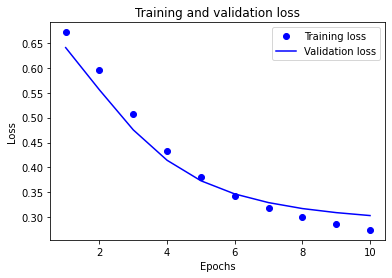

In [122]:
import matplotlib.pyplot as plt
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

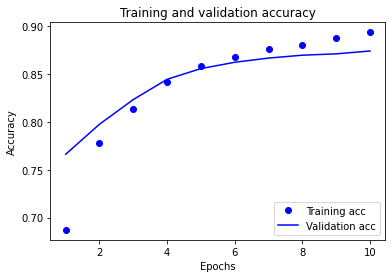

In [123]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [128]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 7s 8ms/step - loss: 0.3158 - accuracy: 0.8711
0.8710799813270569


In [129]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

array([[0.6051152 ],
       [0.44049087],
       [0.3425265 ]], dtype=float32)